In [2]:
import pandas as pd

In [3]:
df = pd.read_csv('car_ownership_income_dataset.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 2 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Monthly_Income_USD  60 non-null     float64
 1   Owns_Car            60 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 1.1 KB


In [9]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

X = df[['Monthly_Income_USD']]
y=df['Owns_Car']

In [10]:
X_train, X_test, y_train, y_test=train_test_split(X, y, random_state=42, train_size=0.2)
model = LogisticRegression()
model.fit(X_train, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [11]:
y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.8333333333333334


/Users/mclight/Downloads/GitHub/AI_Self-Study/.conda/lib/python3.11/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


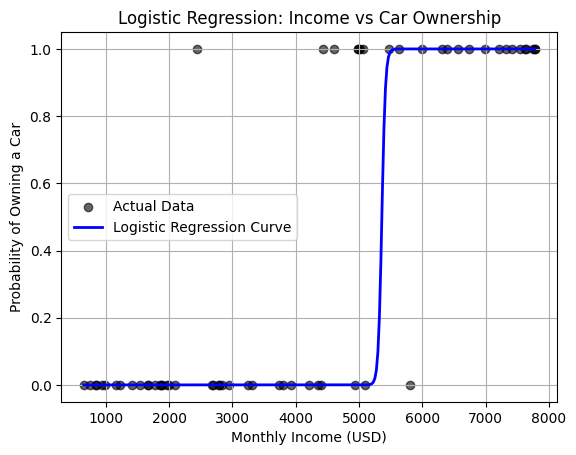

In [12]:
import numpy as np
import matplotlib.pyplot as plt

X_range = np.linspace(X["Monthly_Income_USD"].min(), X["Monthly_Income_USD"].max(), 300).reshape(-1, 1)
y_prob = model.predict_proba(X_range)[:, 1]
plt.scatter(X, y, color='black', label='Actual Data', alpha=0.6)
plt.plot(X_range, y_prob, color='blue', linewidth=2, label='Logistic Regression Curve')
plt.xlabel("Monthly Income (USD)")
plt.ylabel("Probability of Owning a Car")
plt.title("Logistic Regression: Income vs Car Ownership")
plt.legend()
plt.grid(True)